In [1]:
import torch

from train_supervision import *

config = py2cfg('config/potsdam/ftunetformer.py')
model = Supervision_Train.load_from_checkpoint(os.path.join(config.weights_path, config.test_weights_name+'.ckpt'), config=config)

C:\Users\6160-04\PycharmProjects\GeoSeg\venv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\6160-04\PycharmProjects\GeoSeg\venv\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\6160-04\PycharmProjects\GeoSeg\venv\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\6160-04\PycharmProjects\GeoSeg\venv\lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")
C:\Users\6160-04\PycharmProjects\GeoSeg\venv\lib\site-packages\torch\functional.py:504: UserWarning:

torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3484.)



In [2]:

model.cuda()
model.eval()

Supervision_Train(
  (net): FTUNetFormer(
    (backbone): SwinTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
        (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (layers): ModuleList(
        (0): BasicLayer(
          (blocks): ModuleList(
            (0): SwinTransformerBlock(
              (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (attn): WindowAttention(
                (qkv): Linear(in_features=128, out_features=384, bias=True)
                (attn_drop): Dropout(p=0.0, inplace=False)
                (proj): Linear(in_features=128, out_features=128, bias=True)
                (proj_drop): Dropout(p=0.0, inplace=False)
                (softmax): Softmax(dim=-1)
              )
              (drop_path): Identity()
              (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (

In [3]:
from torchvision.transforms import transforms
from geoseg.datasets.potsdam_dataset import val_aug
import albumentations as albu

transform = albu.Compose([
        # albu.RandomBrightnessContrast(brightness_limit=0.25, contrast_limit=0.25, p=0.15),
        # albu.RandomRotate90(p=0.25),
        albu.Normalize(),
        albu.Resize(1024,1024)
    ])

In [61]:
from PIL import Image
import cv2
import numpy as np

img = Image.open('data/test_img/TEST_00006.png')
img = np.array(img)
img = transform(image=img)['image']
mask = cv2.imread('data/annotations/val/TRAIN_0002.png', cv2.IMREAD_GRAYSCALE)

In [5]:
img

array([[[-0.2855553 , -0.24999997,  0.19991288],
        [-0.2855553 , -0.24999997,  0.19991288],
        [-0.31204516, -0.26313022,  0.18847497],
        ...,
        [-1.34729   , -0.91526604, -0.6366884 ],
        [-1.34729   , -0.91526604, -0.6366884 ],
        [-1.34729   , -0.91526604, -0.6366884 ]],

       [[-0.2855553 , -0.24999997,  0.19991288],
        [-0.2855553 , -0.24999997,  0.19991288],
        [-0.31204516, -0.26313022,  0.18847497],
        ...,
        [-1.34729   , -0.91526604, -0.6366884 ],
        [-1.34729   , -0.91526604, -0.6366884 ],
        [-1.34729   , -0.91526604, -0.6366884 ]],

       [[-0.28073898, -0.24343485,  0.20563184],
        [-0.28073898, -0.24343485,  0.20563184],
        [-0.3074546 , -0.25687283,  0.19381095],
        ...,
        [-1.3577254 , -0.9259344 , -0.64649236],
        [-1.3577254 , -0.9259344 , -0.64649236],
        [-1.3577254 , -0.9259344 , -0.64649236]],

       ...,

       [[ 0.42191106,  0.5599724 ,  1.1639651 ],
        [ 0

In [6]:
model.cuda()

Supervision_Train(
  (net): FTUNetFormer(
    (backbone): SwinTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
        (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (layers): ModuleList(
        (0): BasicLayer(
          (blocks): ModuleList(
            (0): SwinTransformerBlock(
              (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (attn): WindowAttention(
                (qkv): Linear(in_features=128, out_features=384, bias=True)
                (attn_drop): Dropout(p=0.0, inplace=False)
                (proj): Linear(in_features=128, out_features=128, bias=True)
                (proj_drop): Dropout(p=0.0, inplace=False)
                (softmax): Softmax(dim=-1)
              )
              (drop_path): Identity()
              (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (

In [122]:
img = Image.open('data/test_img/TEST_12000.png')
img = np.array(img)
img = transform(image=img)['image']
img = torch.from_numpy(img).unsqueeze(0).permute(0,3, 1, 2).float().cuda()
print(img.size())
a = model(img)

torch.Size([1, 3, 1024, 1024])


C:\Users\6160-04\AppData\Local\Temp\ipykernel_23012\3337106772.py:20: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



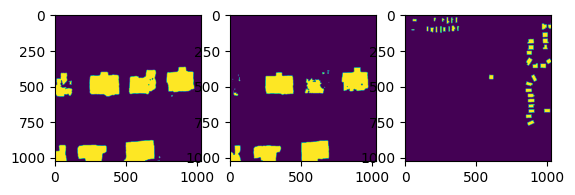

In [123]:
#pyplot a
import matplotlib.pyplot as plt

plt.imshow(a[0][5].cpu().detach().numpy())
#show all a[0][0] to a[0][7] in subplot 2 * 4
# for i in range(8):
#     plt.subplot(2,4,i+1)
#     plt.imshow(a[0][i].cpu().detach().numpy())
# show bar about value
#plt.colorbar()
#remain only 0 upper value
new_a = a[0][1] - a[0][0]
predictions = torch.sigmoid(new_a).cpu().detach().numpy()
predictions2 = torch.sigmoid(a[0][1]).cpu().detach().numpy()
predictions = (predictions > 0.35).astype(np.uint8)
predictions2 = (predictions2 > 0.35).astype(np.uint8)
# compare with mask
plt.imshow(mask)
# show both 2 image using subplot
plt.subplot(1,3,1)
plt.imshow(predictions2, vmin=0, vmax=1)
plt.subplot(1,3,2)
plt.imshow(predictions)
plt.subplot(1,3,3)
plt.imshow(mask)
#remain only 0 upper value



In [119]:
#get dice score between mask and prediction
from tools.metric import Evaluator
evalu = Evaluator(2)
mask = Image.open('data/annotations/val/TRAIN_0002.png')
mask = np.array(mask)
mask[mask > 0] = 1.
evalu.add_batch(mask,predictions)
print(evalu.confusion_matrix)
print(evalu.Dice())



[[1005973.   14954.]
 [  27649.       0.]]
[0.97926406 0.        ]


In [ ]:
predictions

In [4]:
def rle_decode(mask_rle, shape):
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

In [5]:
# RLE 인코딩 함수
def rle_encode(mask):
    pixels = mask.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

In [6]:
#make image dataset that return only image in /data/test_img
from torch.utils.data import Dataset
from PIL import Image
import os
import numpy as np
import cv2
class ImageDataset(Dataset):
    def __init__(self, root, transforms=None):
        self.root = root
        self.transforms = transforms
        self.imgs = list(sorted(os.listdir(os.path.join(root, "test_img"))))

    def __getitem__(self, idx):
        # load images and masks
        img_path = os.path.join(self.root, "test_img", self.imgs[idx])
        img = Image.open(img_path)
        img = np.array(img)
        img = transform(image=img)['image']
        img = torch.from_numpy(img).permute(2, 0, 1)
        return img
    def __len__(self):
        return len(self.imgs)
img_test = ImageDataset('data', transform)
img_test[10].shape

torch.Size([3, 1024, 1024])

In [10]:
test_loader = torch.utils.data.DataLoader(
    img_test, batch_size=1, shuffle=False, num_workers=0, pin_memory=True
)

  0%|          | 0/60640 [00:00<?, ?it/s]

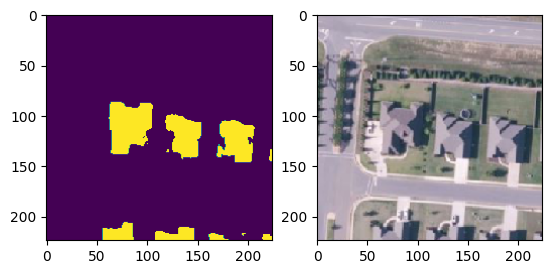

  1%|          | 499/60640 [00:38<1:17:11, 12.98it/s]

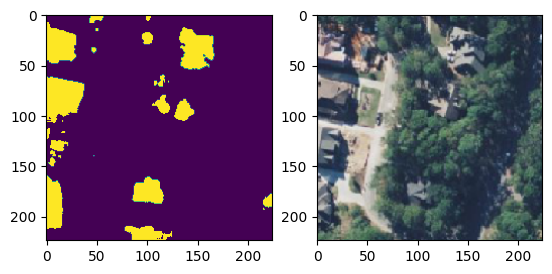

  2%|▏         | 999/60640 [01:17<1:17:57, 12.75it/s]

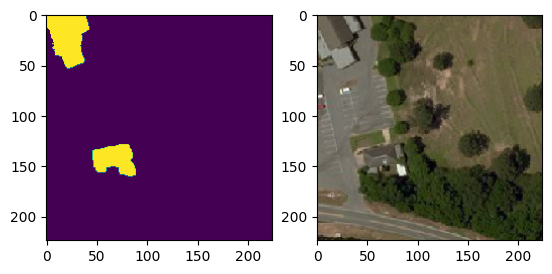

  2%|▏         | 1499/60640 [01:55<1:16:05, 12.96it/s]

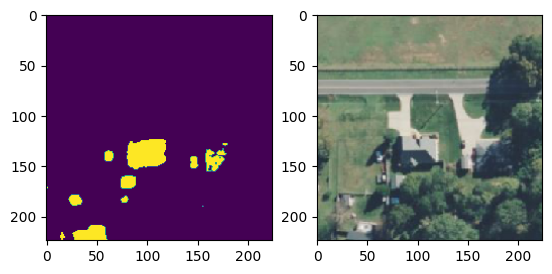

  3%|▎         | 1999/60640 [02:34<1:14:35, 13.10it/s]

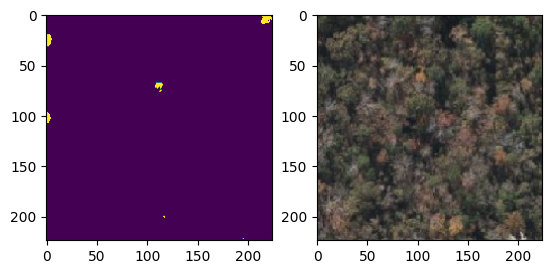

  4%|▍         | 2499/60640 [03:12<1:15:11, 12.89it/s]

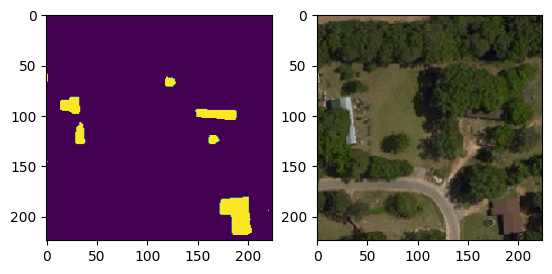

  5%|▍         | 2999/60640 [03:50<1:14:39, 12.87it/s]

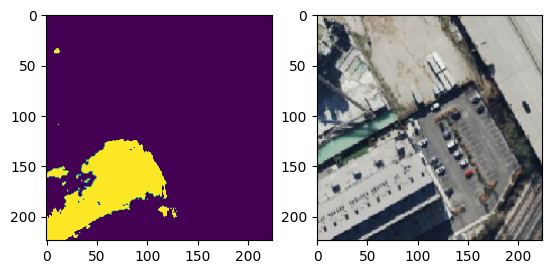

  6%|▌         | 3499/60640 [04:28<1:12:20, 13.16it/s]

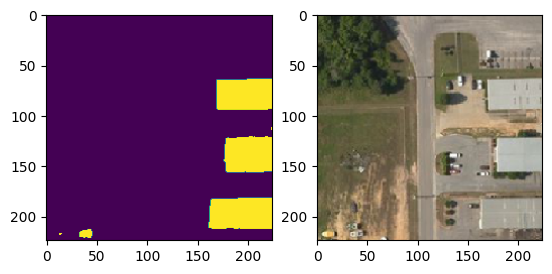

  7%|▋         | 3999/60640 [05:06<1:11:41, 13.17it/s]

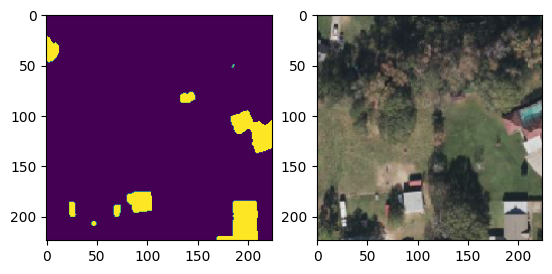

  7%|▋         | 4499/60640 [05:44<1:10:53, 13.20it/s]

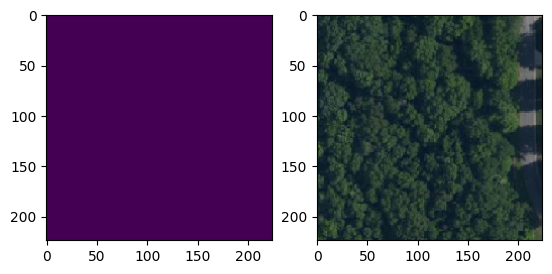

  8%|▊         | 4999/60640 [06:23<1:09:55, 13.26it/s]

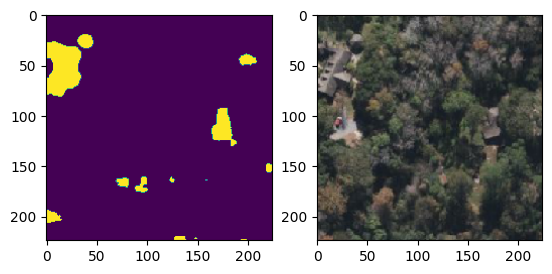

  9%|▉         | 5499/60640 [07:00<1:10:00, 13.13it/s]

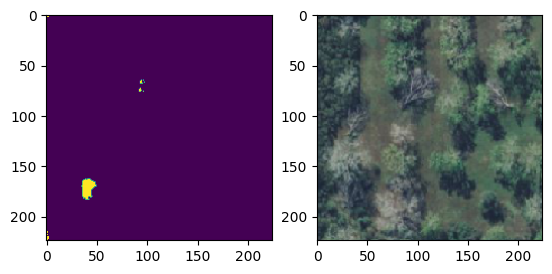

 10%|▉         | 5999/60640 [07:39<1:09:06, 13.18it/s]

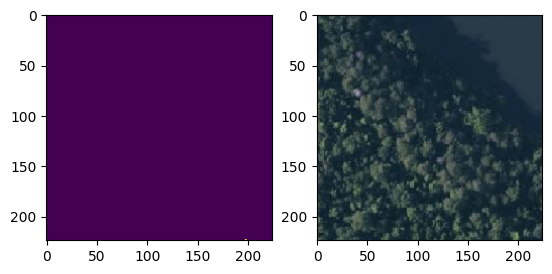

 11%|█         | 6499/60640 [08:17<1:08:49, 13.11it/s]

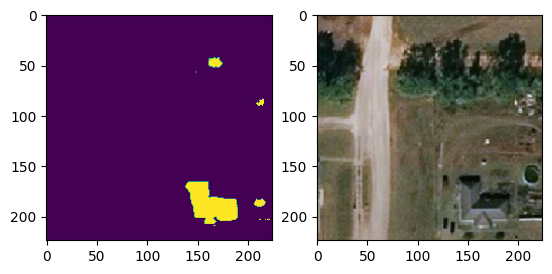

 12%|█▏        | 6999/60640 [08:56<1:07:29, 13.25it/s]

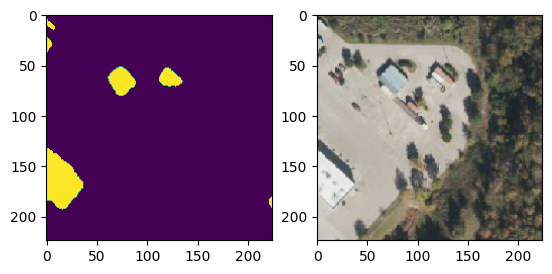

 12%|█▏        | 7499/60640 [09:34<1:07:17, 13.16it/s]

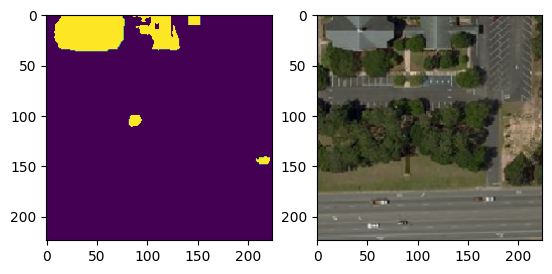

 13%|█▎        | 7999/60640 [10:12<1:06:23, 13.22it/s]

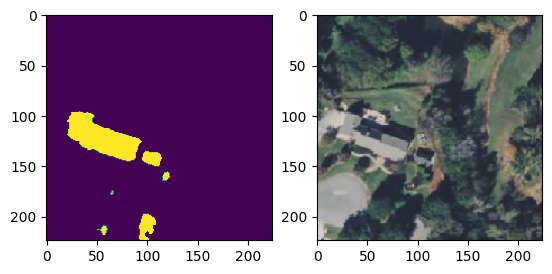

 14%|█▍        | 8499/60640 [10:50<1:05:45, 13.21it/s]

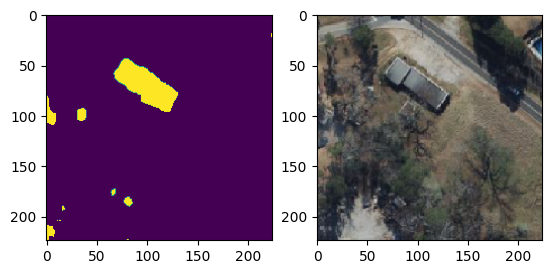

 15%|█▍        | 8999/60640 [11:29<1:06:14, 12.99it/s]

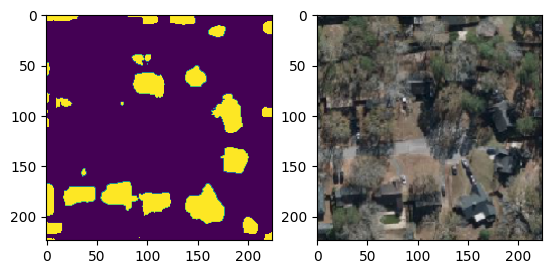

 16%|█▌        | 9499/60640 [12:07<1:05:09, 13.08it/s]

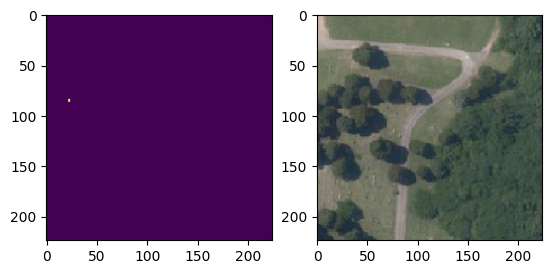

 16%|█▋        | 9999/60640 [12:45<1:04:13, 13.14it/s]

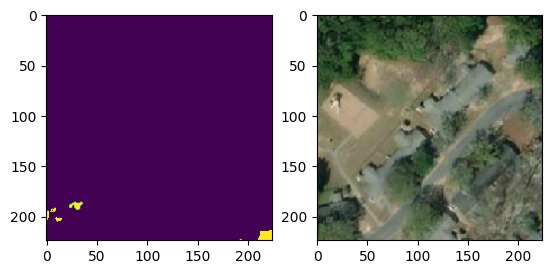

 17%|█▋        | 10499/60640 [13:24<1:03:56, 13.07it/s]

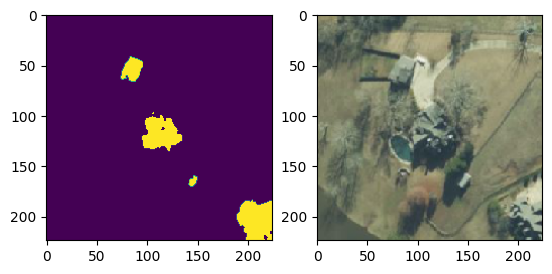

 18%|█▊        | 10999/60640 [14:02<1:03:19, 13.07it/s]

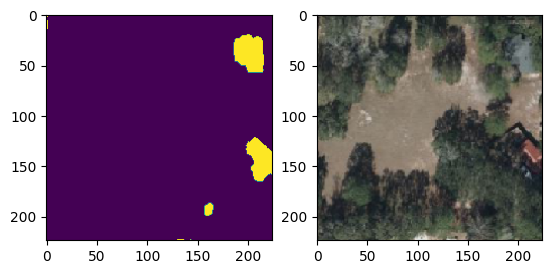

 19%|█▉        | 11499/60640 [14:40<1:01:45, 13.26it/s]

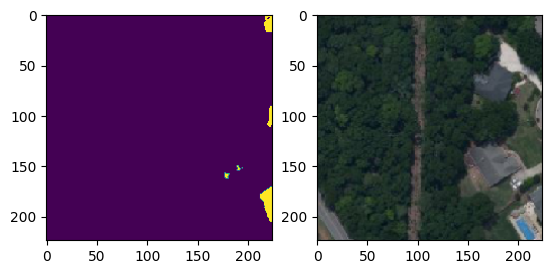

 20%|█▉        | 11999/60640 [15:18<1:02:31, 12.97it/s]

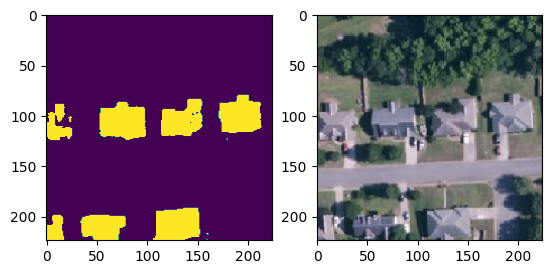

 21%|██        | 12499/60640 [15:56<1:00:44, 13.21it/s]

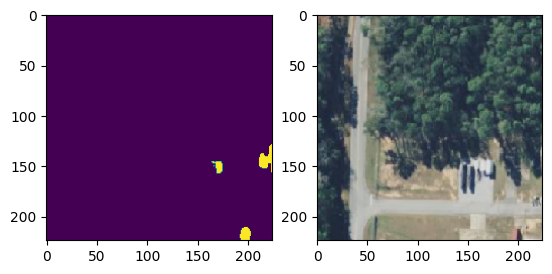

 21%|██▏       | 12999/60640 [16:34<59:39, 13.31it/s]  

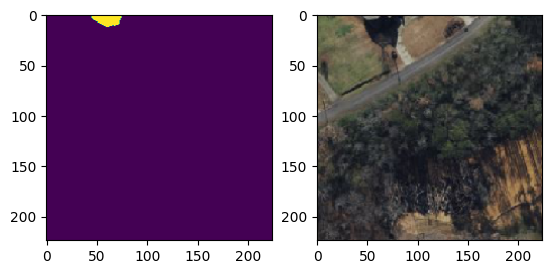

 22%|██▏       | 13499/60640 [17:12<1:00:17, 13.03it/s]

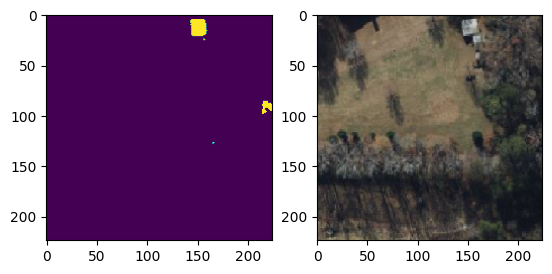

 23%|██▎       | 13999/60640 [17:51<58:50, 13.21it/s]  

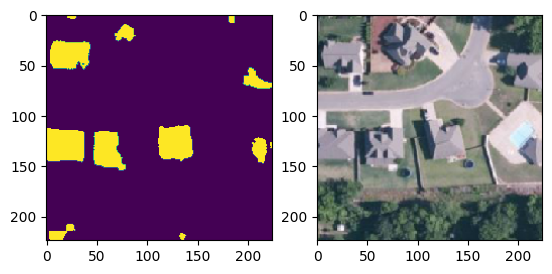

 24%|██▍       | 14499/60640 [18:29<58:25, 13.16it/s]  

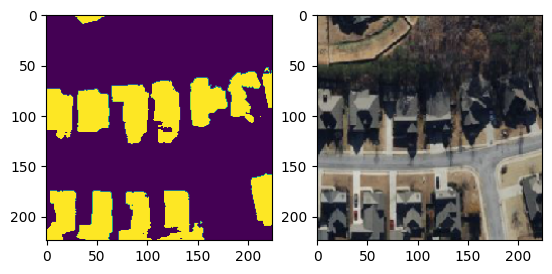

 25%|██▍       | 14999/60640 [19:07<57:40, 13.19it/s]  

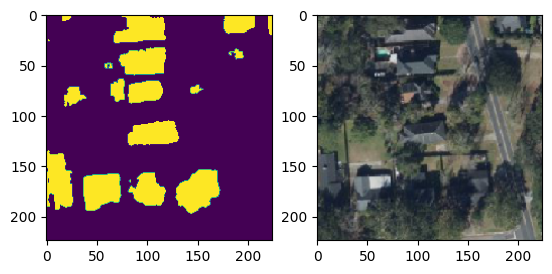

 26%|██▌       | 15499/60640 [19:44<56:38, 13.28it/s]  

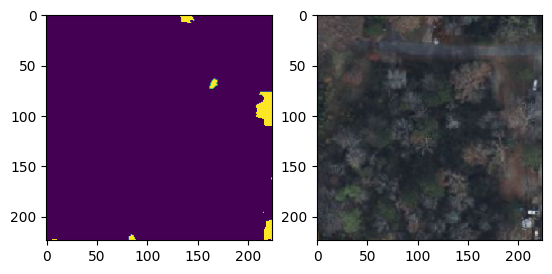

 26%|██▋       | 15999/60640 [20:22<55:53, 13.31it/s]  

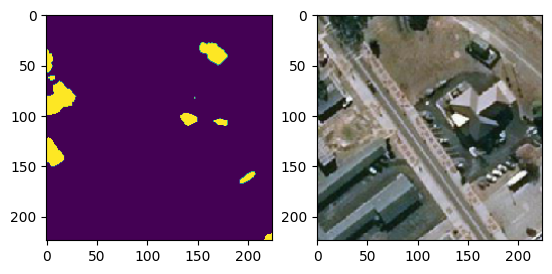

 27%|██▋       | 16499/60640 [21:00<55:18, 13.30it/s]  

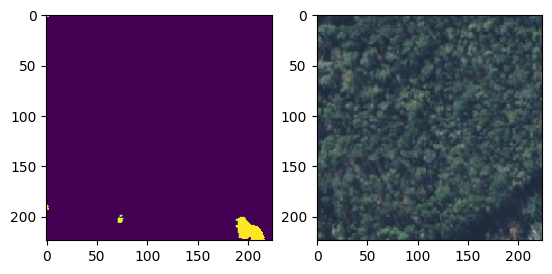

 28%|██▊       | 16999/60640 [21:37<54:47, 13.27it/s]  

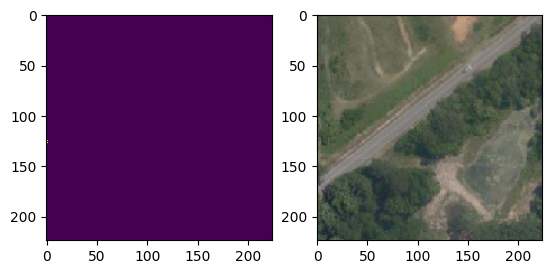

 29%|██▉       | 17499/60640 [22:15<54:36, 13.17it/s]  

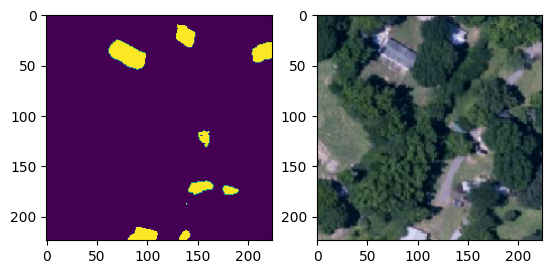

 30%|██▉       | 17999/60640 [22:53<53:56, 13.18it/s]  

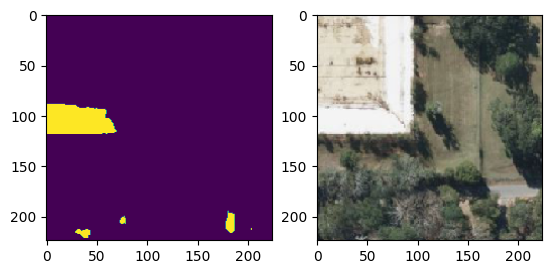

 31%|███       | 18499/60640 [23:31<52:34, 13.36it/s]  

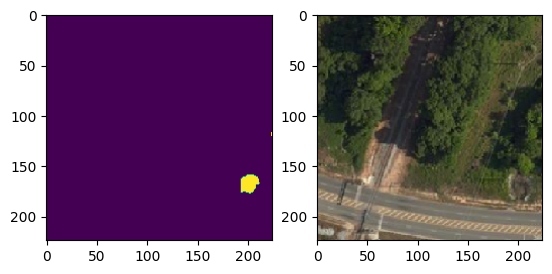

 31%|███▏      | 18999/60640 [24:08<51:58, 13.35it/s]  

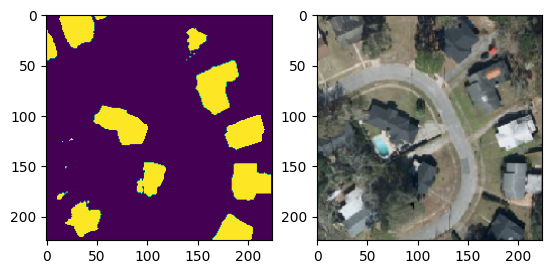

 32%|███▏      | 19499/60640 [24:46<51:23, 13.34it/s]  

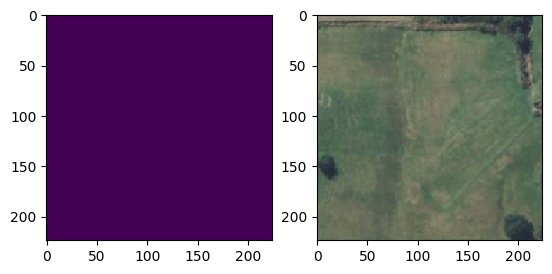

 33%|███▎      | 19999/60640 [25:24<51:16, 13.21it/s]  

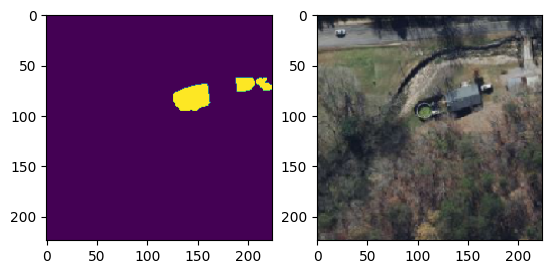

 34%|███▍      | 20499/60640 [26:02<50:06, 13.35it/s]  

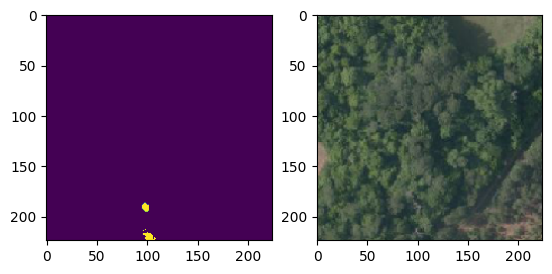

 35%|███▍      | 20999/60640 [26:39<49:57, 13.22it/s]

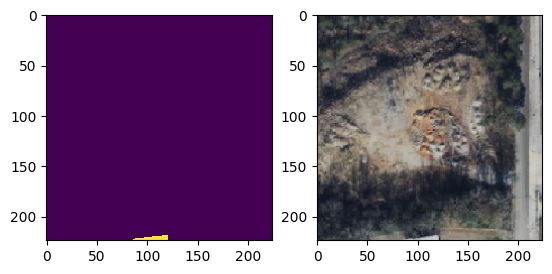

 35%|███▌      | 21499/60640 [27:17<49:04, 13.30it/s]

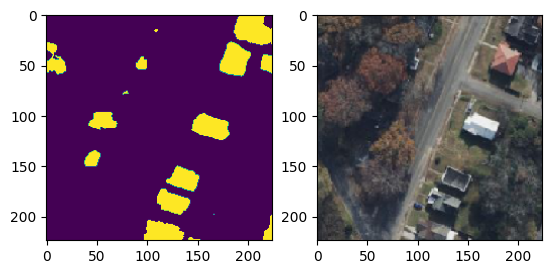

 36%|███▋      | 21999/60640 [27:55<48:28, 13.29it/s]  

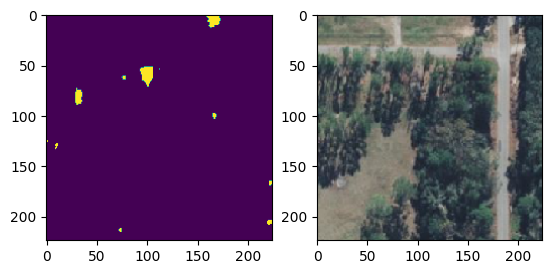

 37%|███▋      | 22499/60640 [28:33<47:46, 13.30it/s]

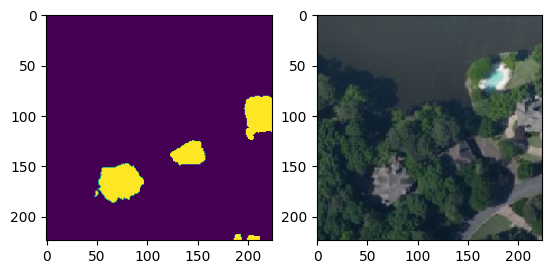

 38%|███▊      | 22999/60640 [29:11<47:25, 13.23it/s]

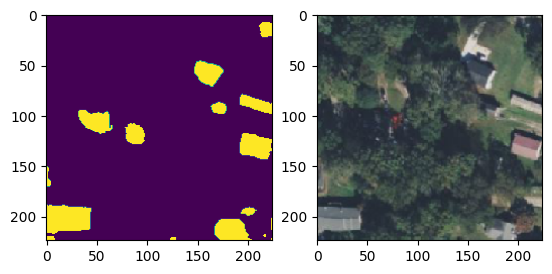

 39%|███▉      | 23499/60640 [29:49<46:56, 13.19it/s]

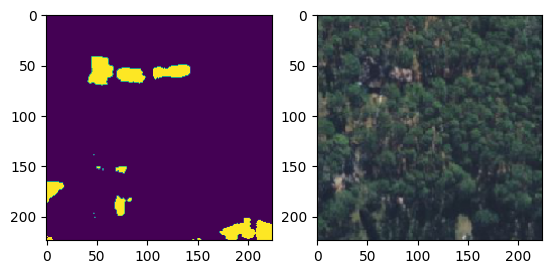

 40%|███▉      | 23999/60640 [30:27<46:54, 13.02it/s]

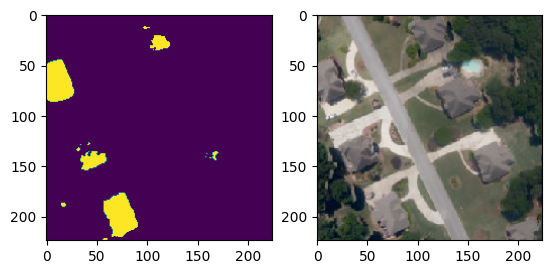

 40%|████      | 24499/60640 [31:05<45:35, 13.21it/s]

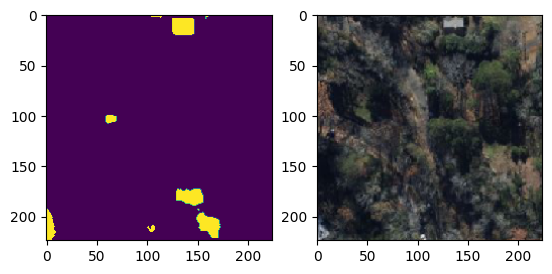

 41%|████      | 24999/60640 [31:43<45:09, 13.15it/s]

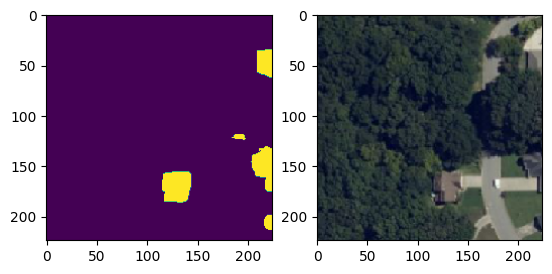

 42%|████▏     | 25499/60640 [32:21<44:35, 13.13it/s]

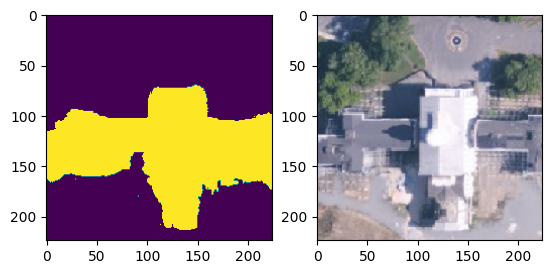

 43%|████▎     | 25999/60640 [33:00<44:34, 12.95it/s]

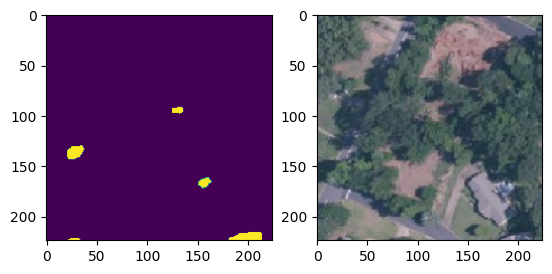

 44%|████▎     | 26499/60640 [33:38<43:24, 13.11it/s]

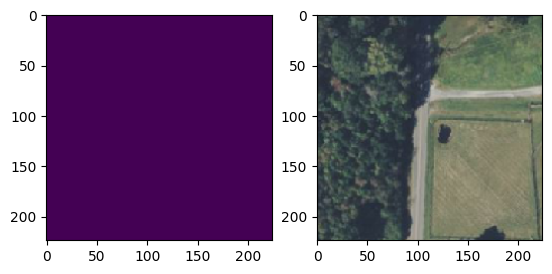

 45%|████▍     | 26999/60640 [34:16<43:26, 12.91it/s]

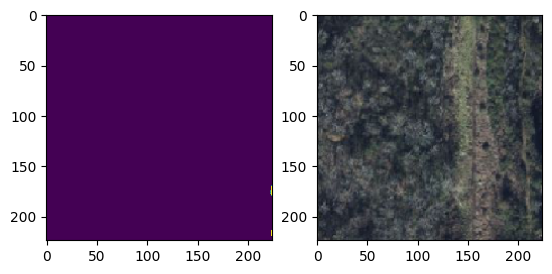

 45%|████▌     | 27499/60640 [34:54<42:10, 13.09it/s]

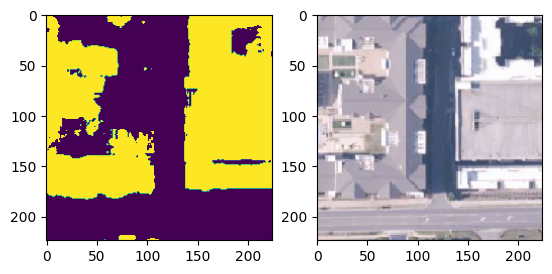

 46%|████▌     | 27999/60640 [35:33<41:58, 12.96it/s]

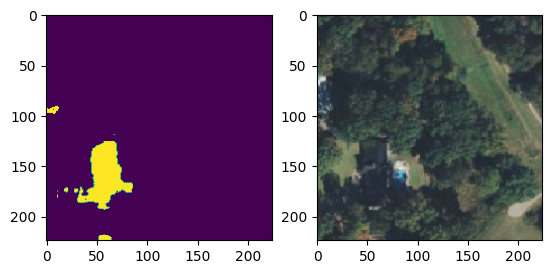

 47%|████▋     | 28499/60640 [36:11<40:53, 13.10it/s]

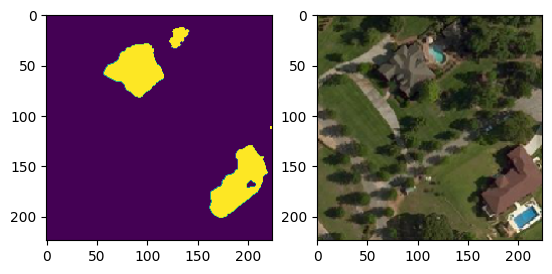

 48%|████▊     | 28999/60640 [36:50<40:08, 13.14it/s]

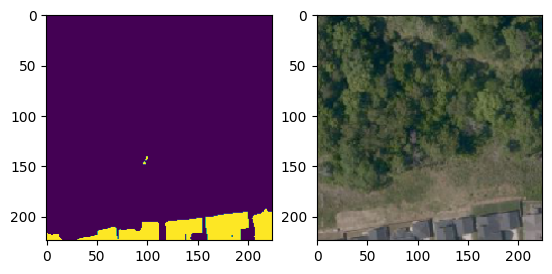

 49%|████▊     | 29499/60640 [37:28<39:58, 12.98it/s]

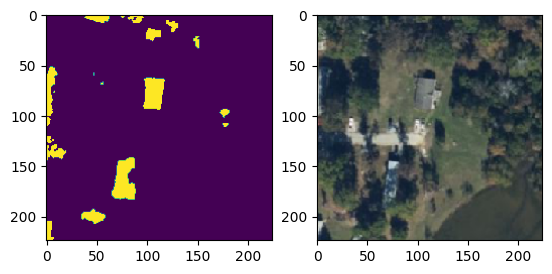

 49%|████▉     | 29903/60640 [37:59<40:00, 12.81it/s]

In [ ]:
from tqdm import tqdm
import matplotlib.pyplot as plt

with torch.no_grad():
    with torch.inference_mode():
        model.eval()
        result = []
        for inx, images in enumerate(tqdm(test_loader)):
            images = images.float().cuda()
            outputs = model(images)
            #reshape outputs to 256,256 using transform

            new_outputs = outputs[:,1,:,:]
            predictions = torch.sigmoid(new_outputs).cpu().detach().numpy()
            predictions = (predictions > 0.35).astype(np.uint8)
            #for every 1000 images, show image and mask
            if inx % 500 == 0:
                plt.subplot(1,2,1)
                plt.imshow(albu.Resize(224,224)(image=predictions[0])['image'])
                plt.subplot(1,2,2)
                # RGB mode
                temp = Image.open(f'data/test_img/TEST_{str(inx).zfill(5)}.png', mode='r').convert('RGB')
                temp = np.array(temp)
                plt.imshow(temp)
                plt.show()
            for i in range(len(images)):
                outputs_transform = albu.Resize(224,224)(image=predictions[i])['image']
                mask_rle = rle_encode(predictions[i])
                if mask_rle == '': # 예측된 건물 픽셀이 아예 없는 경우 -1
                    result.append(-1)
                else:
                    result.append(mask_rle)

In [136]:
print('a')

406826 2 407846 22 408869 49 409893 52 410916 55 411940 57 412081 6 412096 6 412964 59 413101 33 413988 60 414124 48 415011 63 415147 53 416035 64 416170 55 417059 64 417194 55 418083 65 418218 56 419107 66 419241 57 420131 67 420265 58 421155 67 421289 58 422179 67 422312 60 423203 67 423336 60 424227 67 424359 61 425251 68 425383 61 426274 69 426407 61 427298 70 427430 62 428322 71 428454 63 429346 74 429477 64 430370 78 430501 64 431394 84 431524 65 432418 98 432544 69 433442 103 433563 74 434467 194 435491 194 436515 194 437539 194 438563 193 439587 192 440610 193 441634 193 442658 193 443682 193 444706 193 445730 193 446754 193 447778 193 448802 193 449826 193 450850 193 451874 192 452897 193 453921 193 454945 193 455969 193 456993 193 458017 193 459040 194 460064 194 461088 194 462112 194 463136 194 464160 194 465184 194 465449 3 465465 9 465481 4 466208 194 466471 7 466484 32 467231 195 467494 47 468255 195 468518 49 469279 195 469541 51 470303 195 470565 53 471327 195 471588 60

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



AttributeError: 'list' object has no attribute 'size'

a
a
a


In [133]:
import pandas as pd

submit = pd.read_csv('./sample_submission.csv')
submit['mask_rle'] = result

In [128]:
submit.to_csv('./submit_ftUnetFormer_base.csv', index=False)